Ashton Carter

Download the data using this link: download the data. (Note: Original data source)

Explore the data - what do you need to do to clean this data?

Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately.

Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset (check out the optional additional 

Pandas resources at the end of this Chapter for more resources on this):

Missing Data, its types, and statistical methods to deal with it
6 Different Ways to Compensate for Missing Values In a Dataset

Dealing with missing data: Key assumptions and methods for applied analysis

Feel free to use any other resources or techniques you find online that you think are appropriate/useful

What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas?

Commit your work to GitHub. Watch this video if you are unsure of how to do this:

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

file_path = ('/content/drive/MyDrive/Panda_eat_bamboo/sales_predictions.csv')

sales = pd.read_csv(file_path)

sales.info()
sales.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:


# decided to fill missing values with 0 and add a flag to the row so that the other data wouldn't be lost.  The flag will be able to alert the future model to treat this data differently
sales['Missing_Item_Weight'] = sales['Item_Weight'].isnull()

# created a separate class of "missing" so that other data wouldn't be lost.  
sales['Item_Weight'] = sales.loc[:,'Item_Weight'].fillna(0)
sales['Outlet_Size'] = sales.loc[:,'Outlet_Size'].fillna('Missing')



In [ ]:
#Testing to see that na values are gone
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Missing_Item_Weight        8523 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(7)
memo

In [ ]:

#consolidating data entries that are presumably the same

sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('LF','Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('low fat','Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('reg','Regular')


sales.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


In [ ]:
# Checking that only two types remain
sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
outlet_size_viz = sales.loc[:,:].groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
#sales.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].sum()
#outlet_size_viz.values

# various pairings of data output to see if any trends emerge. will graph below
item_fat_viz = sales.loc[:,:].groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_type_viz = sales.loc[:,:].groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_MRP_viz = sales.loc[:,:].groupby(['Item_MRP'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_ID_viz = sales.loc[:,:].groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
item_estab_viz = sales.loc[:,:].groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)
item_otype_viz = sales.loc[:,:].groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending = False)


[7489718.6916, 4566212.197199999, 4392530.943400005, 2142663.5781999985]
['Medium', 'Small', 'Missing', 'High']


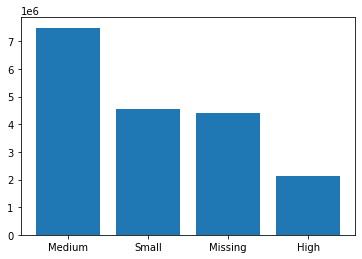

In [17]:
plt.bar(outlet_size_viz.index, outlet_size_viz.values)





<BarContainer object of 2 artists>

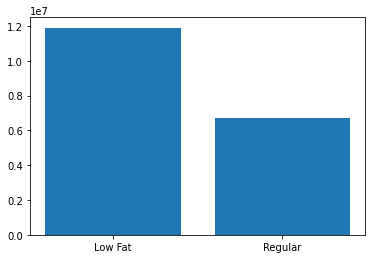

In [ ]:

# I didn't add labels and such since I don't expect these graphs to remain in the final.
plt.bar(item_fat_viz.index, item_fat_viz.values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

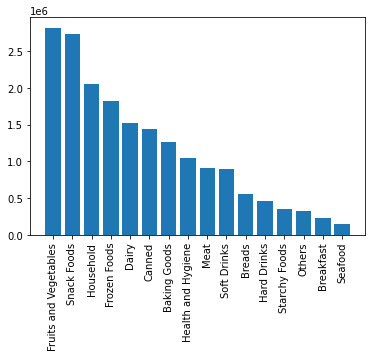

In [20]:
plt.bar(item_type_viz.index, item_type_viz.values)
plt.xticks(rotation = 90)

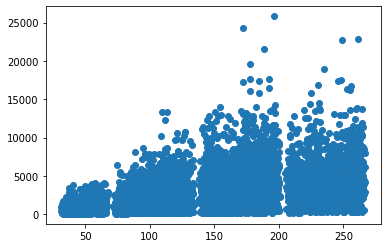

In [26]:
plt.scatter(item_MRP_viz.index, item_MRP_viz.values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

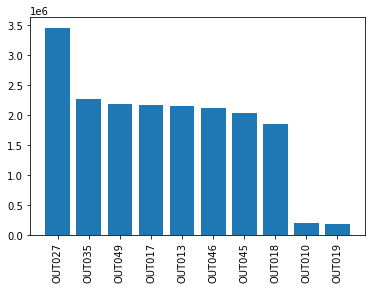

In [28]:
plt.bar(item_ID_viz.index, item_ID_viz.values)
plt.xticks(rotation = 90)

<BarContainer object of 9 artists>

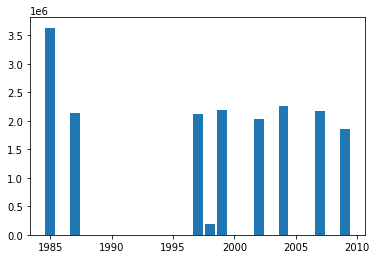

In [32]:
plt.bar(item_estab_viz.index, item_estab_viz.values)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

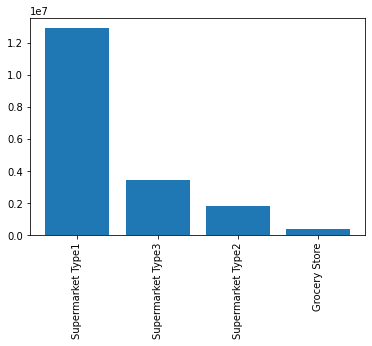

In [34]:
# supermarket type 1 is way above other types but in the previous graph 1985 is way above. I thought grocery store and 1985 were strongly correlated
plt.bar(item_otype_viz.index, item_otype_viz.values)
plt.xticks(rotation = 90)